In [1]:
from google.colab import files
from IPython.display import Image

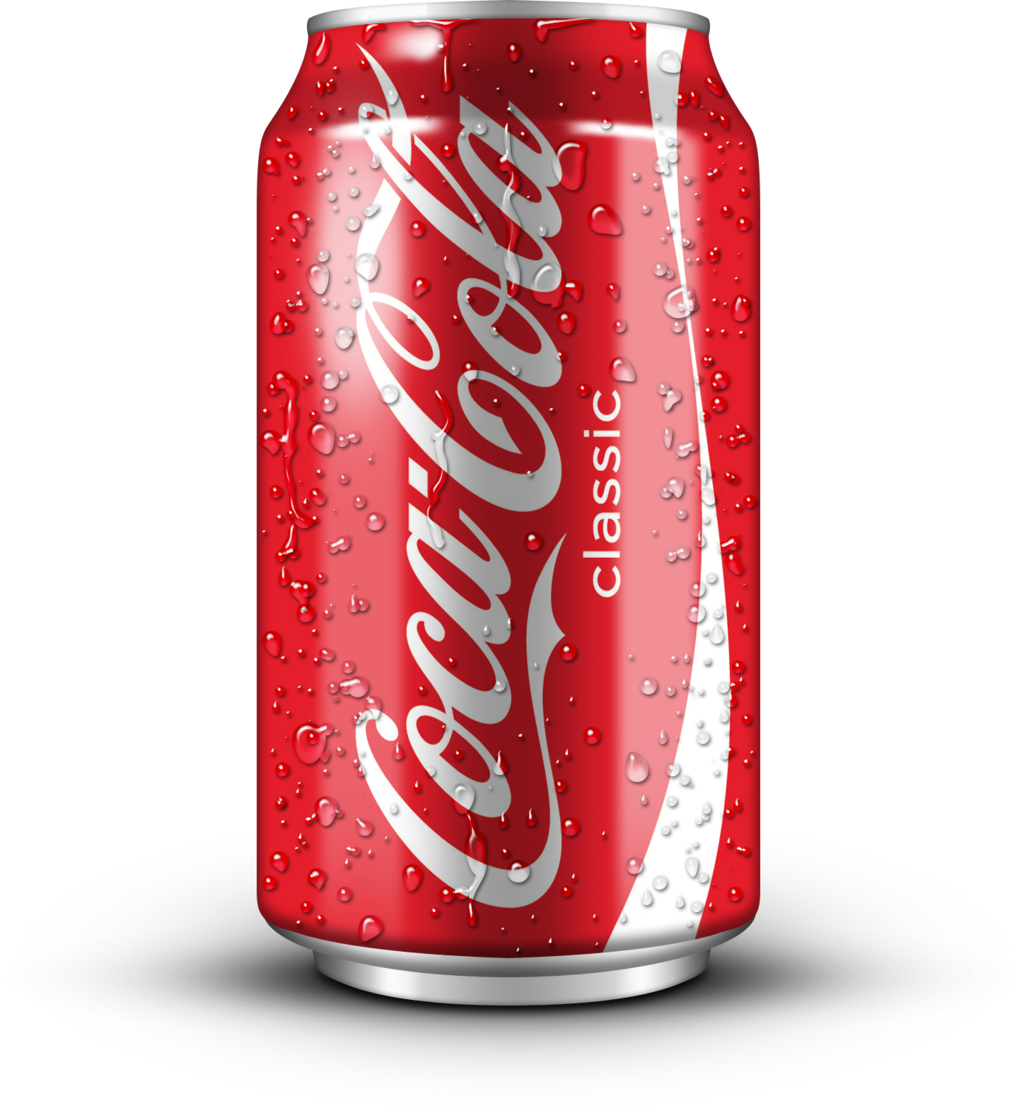

In [2]:
Image('/content/coca-cola-png-11036.png',width=725)

Import Libraries

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error

In [4]:
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
df=pd.read_csv('/content/COCO COLA.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900
15095,2021-12-17,58.490002,58.919998,57.700001,57.730000,57.730000,51874400


In [8]:
print (df.describe())

               Open          High           Low         Close     Adj Close  \
count  15096.000000  15096.000000  15096.000000  15096.000000  15096.000000   
mean      16.056202     16.188428     15.921876     16.060734     11.367487   
std       16.939301     17.064336     16.811753     16.941712     14.253637   
min        0.192708      0.193359      0.182292      0.192057      0.037855   
25%        0.860677      0.869792      0.854167      0.860352      0.242312   
50%        9.328125      9.398438      9.218750      9.351562      4.642848   
75%       28.875000     29.167500     28.563125     28.901562     17.251080   
max       59.810001     60.130001     59.619999     60.130001     58.650002   

             Volume  
count  1.509600e+04  
mean   9.032904e+06  
std    7.935744e+06  
min    7.680000e+04  
25%    2.812800e+06  
50%    7.585200e+06  
75%    1.291275e+07  
max    1.241690e+08  


In [9]:
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,1962-01-02,0.263021
1,1962-01-03,0.257161
2,1962-01-04,0.259115


In [10]:
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
1962-01-02  0.263021
1962-01-03  0.257161
1962-01-04  0.259115
                Close
Date                 
2021-12-15  58.060001
2021-12-16  58.650002
2021-12-17  57.730000


<Axes: xlabel='Date'>

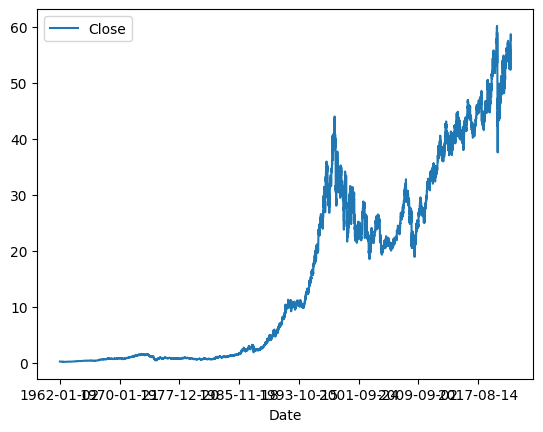

In [11]:
df_ts.plot()

Stationary Test

In [12]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")

    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

In [13]:
# Convert the DF to series first
ts = df_ts['Close']

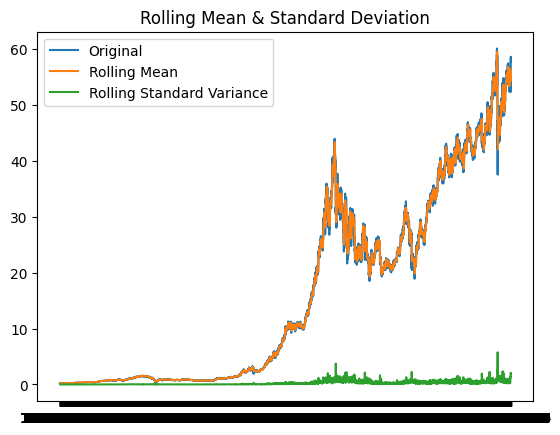

In [14]:
# Let's plot the 12-Month Moving Rolling Mean & Variance and find Insights
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [15]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                     0.527771
p-value                            0.985693
#lags Used                        43.000000
Number of Observations Used    15052.000000
Critical Value (1%)               -3.430785
Critical Value (5%)               -2.861732
Critical Value (10%)              -2.566872
dtype: float64
